In [80]:
import math
import os
from os.path import isfile, join
import glob

In [47]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.
    
    Args:
    - point1: A tuple representing the (x, y) coordinates of the first point.
    - point2: A tuple representing the (x, y) coordinates of the second point.
    
    Returns:
    - The Euclidean distance between the two points.
    """
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# def normalize_to_pixels(annotation, width, height):
#     # Convert normalized coordinates to pixel values
#     # data = annotation.split()
    
#     # width, height = 3840,2160
#     object_id = annotation[0]
#     object_class = annotation[1]
#     x, y, w, h = map(float, annotation)
    
#     # object_id, x_norm, y_norm, w_norm, h_norm = annotation
#     x1 = int((x - w / 2) * width)
#     y1 = int((y - h / 2) * height)
#     x2 = int((x + w / 2) * width)
#     y2 = int((y + h / 2) * height)
#     return object_id,object_class, x1, y1, x2, y2

# def normalize_bbox(bbox, width, height):
#     """
#     Normalize bounding box coordinates to range [0, 1].
    
#     Args:
#     - bbox (tuple): Bounding box coordinates (x1, y1, x2, y2).
#     - max_x (float): Maximum x-coordinate in the dataset.
#     - max_y (float): Maximum y-coordinate in the dataset.
    
#     Returns:
#     - tuple: Normalized bounding box coordinates (x1, y1, x2, y2).
#     """
#     x1, y1, x2, y2 = bbox
#     normalized_x1 = x1 / max_x
#     normalized_y1 = y1 / max_y
#     normalized_x2 = x2 / max_x
#     normalized_y2 = y2 / max_y
    
#     return (normalized_x1, normalized_y1, normalized_x2, normalized_y2)

def calculate_distance(box1, box2):
    """
    Calculate the distance between the centers of two bounding boxes.

    Args:
    - box1: A tuple representing the coordinates (x1, y1, x2, y2) of the first bounding box.
    - box2: A tuple representing the coordinates (x1, y1, x2, y2) of the second bounding box.

    Returns:
    - The distance between the centers of the two bounding boxes.
    """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2

    center_x1 = (x1 + x2) / 2
    center_y1 = (y1 + y2) / 2

    center_x2 = (x3 + x4) / 2
    center_y2 = (y3 + y4) / 2

    c1 = (center_x1, center_y1)
    c2 = (center_x2, center_y2)

    dc1c2 = euclidean_distance(c1,c2)


    return dc1c2


def find_bbox_center(x1, y1, x2, y2):
    """
    Calculate the center of a bounding box.

    Args:
    - x1, y1: The top-left coordinates of the bounding box.
    - x2, y2: The bottom-right coordinates of the bounding box.

    Returns:
    - A tuple representing the (x, y) coordinates of the center of the bounding box.
    """
    
    center_x = (x1 + x2) / 2
    center_y = (y1 + y2) / 2
    return center_x, center_y

def calculate_iou(box1, box2):
    """
    Calculate Intersection over Union (IoU) between two bounding boxes.

    Args:
    - box1: A tuple representing the coordinates (x1, y1, x2, y2) of the first bounding box.
    - box2: A tuple representing the coordinates (x1, y1, x2, y2) of the second bounding box.

    Returns:
    - The IoU (Intersection over Union) value between the two bounding boxes.
    """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2

    intersection_area = max(0, min(x2, x4) - max(x1, x3)) * max(0, min(y2, y4) - max(y1, y3))
    area1 = (x2 - x1) * (y2 - y1)
    area2 = (x4 - x3) * (y4 - y3)
    union_area = area1 + area2 - intersection_area

    iou = intersection_area / union_area
    return iou

def yolo_to_pixels(image_width, image_height, bbox):
    """
    
width = 3840
height = 2160
    Converts YOLO-formatted bounding box coordinates to pixel coordinates.
    
    Args:
        image_width (int): Width of the image in pixels.
        image_height (int): Height of the image in pixels.
        xc (float): X-coordinate of the bounding box center in normalized YOLO format (between 0 and 1).
        yc (float): Y-coordinate of the bounding box center in normalized YOLO format (between 0 and 1).
        w (float): Width of the bounding box in normalized YOLO format (between 0 and 1).
        h (float): Height of the bounding box in normalized YOLO format (between 0 and 1).
        
    Returns:
        tuple: A tuple containing the (x, y, width, height) of the bounding box in pixel coordinates.
    """
    
    x = bbox[0]
    y = bbox[1]
    w = bbox[2]
    h = bbox[3]
    
    # Convert the coordinates to pixel values
    x1 = int((x - w/2) * image_width)
    y1 = int((y - h/2) * image_height)
    x2 = int((x + w/2) * image_width)
    y2 = int((y + h/2) * image_height)
    

    return x1, y1, x2, y2


def yolo_sys_to_pixels(image_width, image_height, bbox):

    """
    
width = 3840
height = 2160
    Converts YOLO-formatted bounding box coordinates to pixel coordinates.
    
    Args:
        image_width (int): Width of the image in pixels.
        image_height (int): Height of the image in pixels.
        xc (float): X-coordinate of the bounding box center in normalized YOLO format (between 0 and 1).
        yc (float): Y-coordinate of the bounding box center in normalized YOLO format (between 0 and 1).
        w (float): Width of the bounding box in normalized YOLO format (between 0 and 1).
        h (float): Height of the bounding box in normalized YOLO format (between 0 and 1).
        
    Returns:
        tuple: A tuple containing the (x, y, width, height) of the bounding box in pixel coordinates.
    """
    object_id = bbox[0]
    object_class = bbox[1]
    x = bbox[2]
    y = bbox[3]
    w = bbox[4]
    h = bbox[5]
    
    # Convert the coordinates to pixel values
    x1 = int((x - w/2) * image_width)
    y1 = int((y - h/2) * image_height)
    x2 = int((x + w/2) * image_width)
    y2 = int((y + h/2) * image_height)
    

    return object_id,object_class, x1, y1, x2, y2

In [58]:
## Find matching coordinates between system and ground truth 




def find_matching_coordinates(system_annotations, ground_truth_annotations, threshold=0.5):
    """
    Find matching coordinates between system and ground truth annotations.

    Args:
    - system_annotations: A list of tuples representing the system's annotations.
    - ground_truth_annotations: A list of tuples representing the ground truth annotations.
    - threshold: The IoU threshold value for matching annotations.

    Returns:
    - A list of tuples representing the matching coordinates between system and ground truth annotations.
    """
    
    # reverse this function so it loops on the ground truth annotations
    
    
    matching_coordinates = []
    for ground_truth_annotation in ground_truth_annotations:
        ground_truth_pixel = yolo_sys_to_pixels(3840, 2160, ground_truth_annotation)
        ground_truth_bbox = ground_truth_pixel[2:]
        for system_annotation in system_annotations:
            system_bbox = system_annotation[2:]
            iou = calculate_iou(system_bbox, ground_truth_bbox)
            if iou >= threshold:
                matching_coordinates.append((system_annotation, ground_truth_annotation))
                break
    return matching_coordinates

In [70]:
matching_coordinates = []

new_gt=[]
new_sys=[]
for (i,ground_truth_annotation) in enumerate(f31_gt):
    ground_truth_pixel = yolo_sys_to_pixels(3840, 2160, ground_truth_annotation)
    ground_truth_bbox = ground_truth_pixel[2:]
    print(ground_truth_bbox)
    for (j,system_annotation) in enumerate(f31_sys):
        system_bbox = system_annotation[2:]
        iou = calculate_iou(system_bbox, ground_truth_bbox)
        if iou >= 0.5:
            matching_coordinates.append((system_annotation, ground_truth_annotation))
            new_gt.append(ground_truth_pixel)
            new_sys.append(system_annotation)
            print(f'Found a match between {i} and {j}')

(191, 1525, 416, 1642)
Found a match between 0 and 4
(1577, 957, 1664, 1123)
Found a match between 1 and 3
(1649, 986, 1717, 1070)
Found a match between 2 and 5
(0, 1665, 117, 1746)


In [71]:
new_gt

[(0, 0, 191, 1525, 416, 1642),
 (1, 0, 1577, 957, 1664, 1123),
 (2, 1, 1649, 986, 1717, 1070)]

In [72]:
new_sys

[(2,
  0,
  193.20484008168324,
  1521.961939104371,
  394.2003571732768,
  1649.0657252132066),
 (4,
  0,
  1572.923173340264,
  972.2630958787979,
  1687.29280920844,
  1138.7484860089278),
 (1,
  1,
  1658.8441828899445,
  979.9313550282051,
  1710.8115994569189,
  1066.8487112715068)]

In [59]:
# Data from frame 31

f31_gt = [(0, 0, 0.07917320496374831, 0.7331965555267768, 0.058465407937233434, 0.05426997357136711),
(1, 0, 0.42206749363729473, 0.48158891309319085, 0.022609669475727047, 0.07704035525062528),
(2, 1, 0.43833960424482554, 0.4762600347655784, 0.017813678980875793, 0.03897693862482233),
(3, 0, 0.015340206091237632, 0.7899025877621951, 0.030680412182475265, 0.03775890929279658)]

f31_sys = [(11, 1, 3315.3817497239324, 1606.4771773885989 ,3355.041410013423 ,1664.8970024512148),
(7 ,0 ,3281.5098190867184, 1646.620967418295, 3396.2144484318424, 1751.2569153290342),
(5 ,0 ,3712.179631954297, 1408.5980713461308, 3830.09338105932, 1540.2494542392897),
(4 ,0 ,1572.923173340264, 972.2630958787979 ,1687.29280920844, 1138.7484860089278),
(2 ,0 ,193.20484008168324, 1521.961939104371, 394.2003571732768 ,1649.0657252132066),
(1 ,1 ,1658.8441828899445, 979.9313550282051 ,1710.8115994569189, 1066.8487112715068)]

In [43]:
test_gt_pixels = []
for i,t in enumerate(f31_gt):
    # test_gt_pixels[0:1] = t[0:1]
    # test_gt_pixels
    bbox = yolo_to_pixels(3840,2160,t[2:])
    new_coord = (t[0],t[1],*bbox)
    test_gt_pixels.append(new_coord)
    
    

In [44]:
test_gt_pixels

[(0, 0, 191, 1525, 416, 1642),
 (1, 0, 1577, 957, 1664, 1123),
 (2, 1, 1649, 986, 1717, 1070),
 (3, 0, 0, 1665, 117, 1746)]

# Plotting

In [8]:
%matplotlib inline
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
# test case
# (191, 1525, 416, 1642)
# normalized pixel values from frist gt label

bboxes = [( 3315.3817497239324, 1606.4771773885989, 3355.041410013423, 1664.8970024512148),
(3281.5098190867184, 1646.620967418295, 3396.2144484318424, 1751.2569153290342),
(3712.179631954297, 1408.5980713461308, 3830.09338105932, 1540.2494542392897),
(1572.923173340264, 972.2630958787979, 1687.292809208449, 1138.7484860089278),
(193.20484008168324, 1521.961939104371, 394.2003571732768, 1649.0657252132066),
(1658.8441828899445, 979.9313550282051, 1710.8115994569189, 1066.8487112715068)]

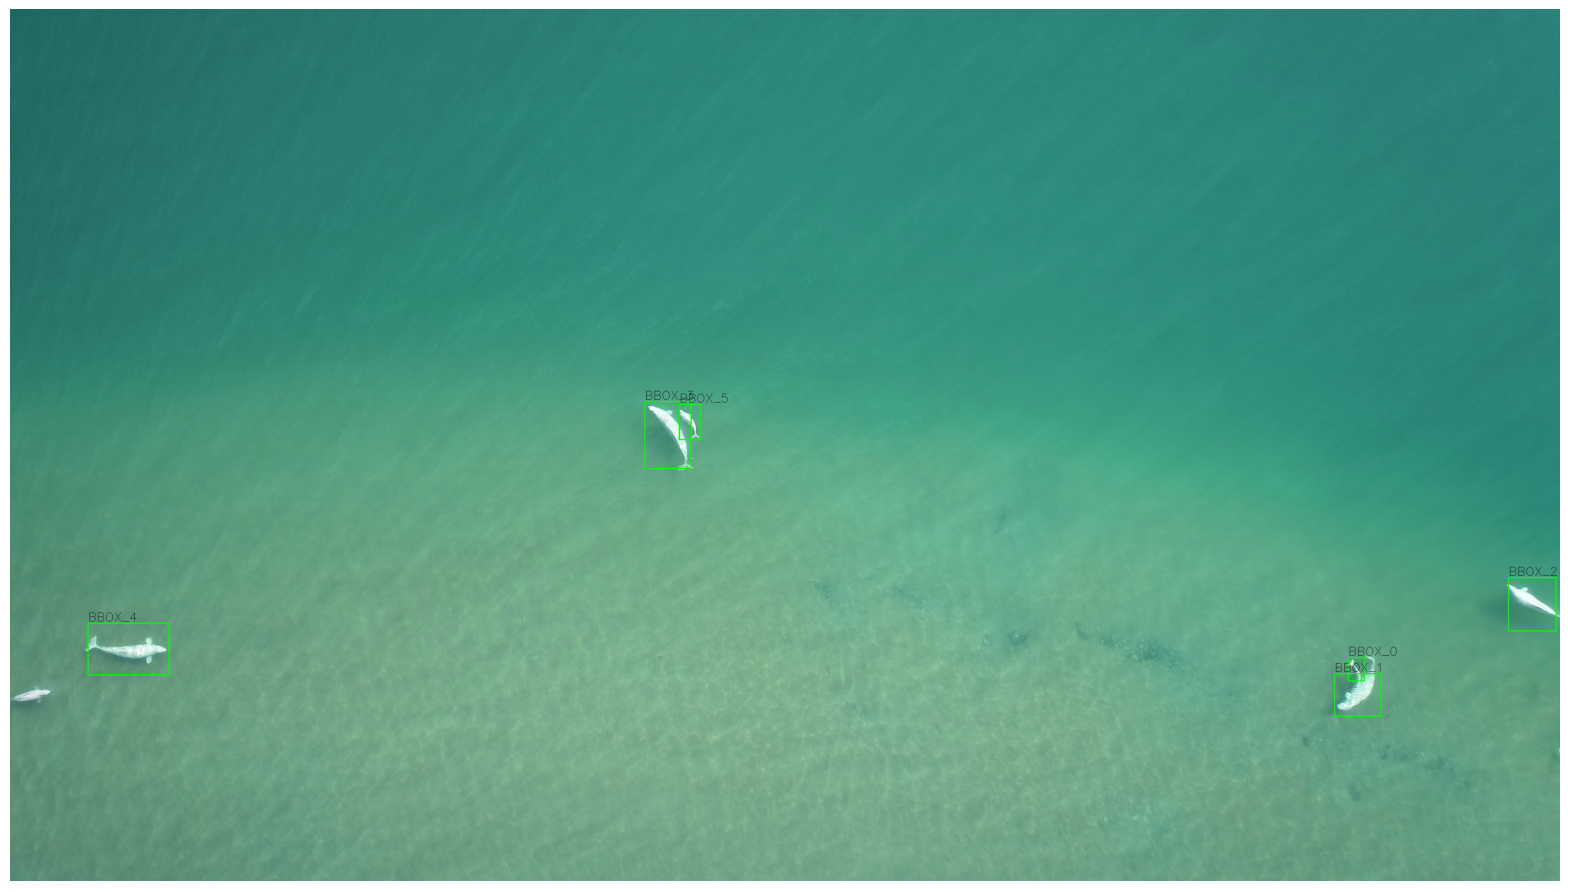

In [12]:
img_path = 'DJI_0004/yolo_dji_0004/frame_0031.png'

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


for (i, bbox) in enumerate(bboxes):

    x1, y1, x2, y2 = bbox
        
    # Draw rectangle on image
    cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Green rectangle
    
    # Draw text
    # Define text parameters
    text = f"BBOX_{i}"
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 1
    # Get text size
    text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
    
    # Calculate text position
    text_x = int(x1)
    text_y = int(y1) - 5 if int(y1) - 5 > 0 else int(y1) + text_size[1] + 5
        
    cv2.putText(img_rgb, text, (text_x, text_y), font, font_scale, (0, 0, 0), font_thickness)

# Display the image
plt.figure(figsize=(20, 15))  # Set the figure size to 10x10 inches
    
# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()


In [ ]:
# Find FP FN

"""
# Find FN

If GT exists but no detection 

find length(GT)
find length(Detection)

if len(GT) > len(Detection):
    FN = len(GT) - len(Detection)
    
    for i in range(FN):
        FN_list.append(GT[i])
        
# Find FP

If detection exists but no GT

find length(GT)
find length(Detection)

if len(GT) < len(Detection):
    FP = len(Detection) - len(GT)
    
    for i in range(FP):
        FP_list.append(Detection[i])
        
# Find Identiy switch

If GT exists and detection exists

for i in range(len(GT)):
    for j in range(len(Detection)):
        if GT[i] == Detection[j]:
            TP += 1
        else:
            Identity_switch += 1
            
            

"""

In [4]:
test_gt = [(0.0, 0.0, 0.07917320496374831, 0.7331965555267768, 0.058465407937233434, 0.05426997357136711),
(1.0, 0.0, 0.42206749363729473, 0.48158891309319085, 0.022609669475727047, 0.07704035525062528),
(2.0, 1.0, 0.43833960424482554, 0.4762600347655784, 0.017813678980875793, 0.03897693862482233),
(3.0, 0.0, 0.015340206091237632, 0.7899025877621951, 0.030680412182475265, 0.03775890929279658)]


test_sys = [(11.0, 1.0, 3315.3817497239324, 1606.4771773885989, 3355.041410013423, 1664.8970024512148),
(7.0, 0.0, 3281.5098190867184, 1646.620967418295, 3396.2144484318424, 1751.2569153290342),
(5.0, 0.0, 3712.179631954297, 1408.5980713461308, 3830.09338105932, 1540.2494542392897),
(4.0, 0.0, 1572.923173340264, 972.2630958787979, 1687.292809208449, 1138.7484860089278),
(2.0, 0.0, 193.20484008168324, 1521.961939104371, 394.2003571732768, 1649.0657252132066),
(1.0, 1.0, 1658.8441828899445, 979.9313550282051, 1710.8115994569189, 1066.8487112715068)]

In [5]:
def calculate_iou(box1, box2):
    """
    Calculate Intersection over Union (IoU) between two bounding boxes.

    Args:
    - box1: A tuple representing the coordinates (x1, y1, x2, y2) of the first bounding box.
    - box2: A tuple representing the coordinates (x1, y1, x2, y2) of the second bounding box.

    Returns:
    - The IoU (Intersection over Union) value between the two bounding boxes.
    """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2

    intersection_area = max(0, min(x2, x4) - max(x1, x3)) * max(0, min(y2, y4) - max(y1, y3))
    area1 = (x2 - x1) * (y2 - y1)
    area2 = (x4 - x3) * (y4 - y3)
    union_area = area1 + area2 - intersection_area

    iou = intersection_area / union_area
    return iou

In [73]:
def compute_metrics(obj_gt, obj_sys):
    """
    
    # [(11.0, 1.0, 3315.3817497239324, 1606.4771773885989, 3355.041410013423, 1664.897002451214,(),...]
    # (object_id, object_class, x1, y1, x2, y2)
    
    # normalize to pixels for gt annotation 
    
    
    """
    
    # Find FN
    FN = 0
    FN_list = []
    
    if len(obj_gt) > len(obj_sys):
        FN = len(obj_gt) - len(obj_sys)
        
        # for i in range(FN):
        #     FN_list.append(obj_gt[i])
            
    # Find FP
    FP = 0
    FP_list = []
    
    if len(obj_gt) < len(obj_sys):
        FP = len(obj_sys) - len(obj_gt)
        
        # for i in range(FP):
        #     FP_list.append(obj_sys[i])
            
    # Find Identity switch
    TP = 0
    Identity_switch = 0
    
    for i in range(len(obj_gt)):
        for j in range(len(obj_sys)):
            if obj_gt[i][0] == obj_sys[j][0]:
                TP += 1
            else:
                Identity_switch += 1
    
    # Identity_switch = 1
    mota = 1 - (FP + FN + Identity_switch) / len(obj_gt)
    
    
    
    print(f"Metrics:\n\tFP {FP}\n\tFN {FN}\n\tIdentity_switch {Identity_switch}\n\tMOTA {mota}")
    
    return FN, FP, Identity_switch, mota
    
    

In [74]:
fn, fp, ids, mota = compute_metrics(new_gt, new_sys)

Metrics:
	FP 0
	FN 0
	Identity_switch 7
	MOTA -1.3333333333333335


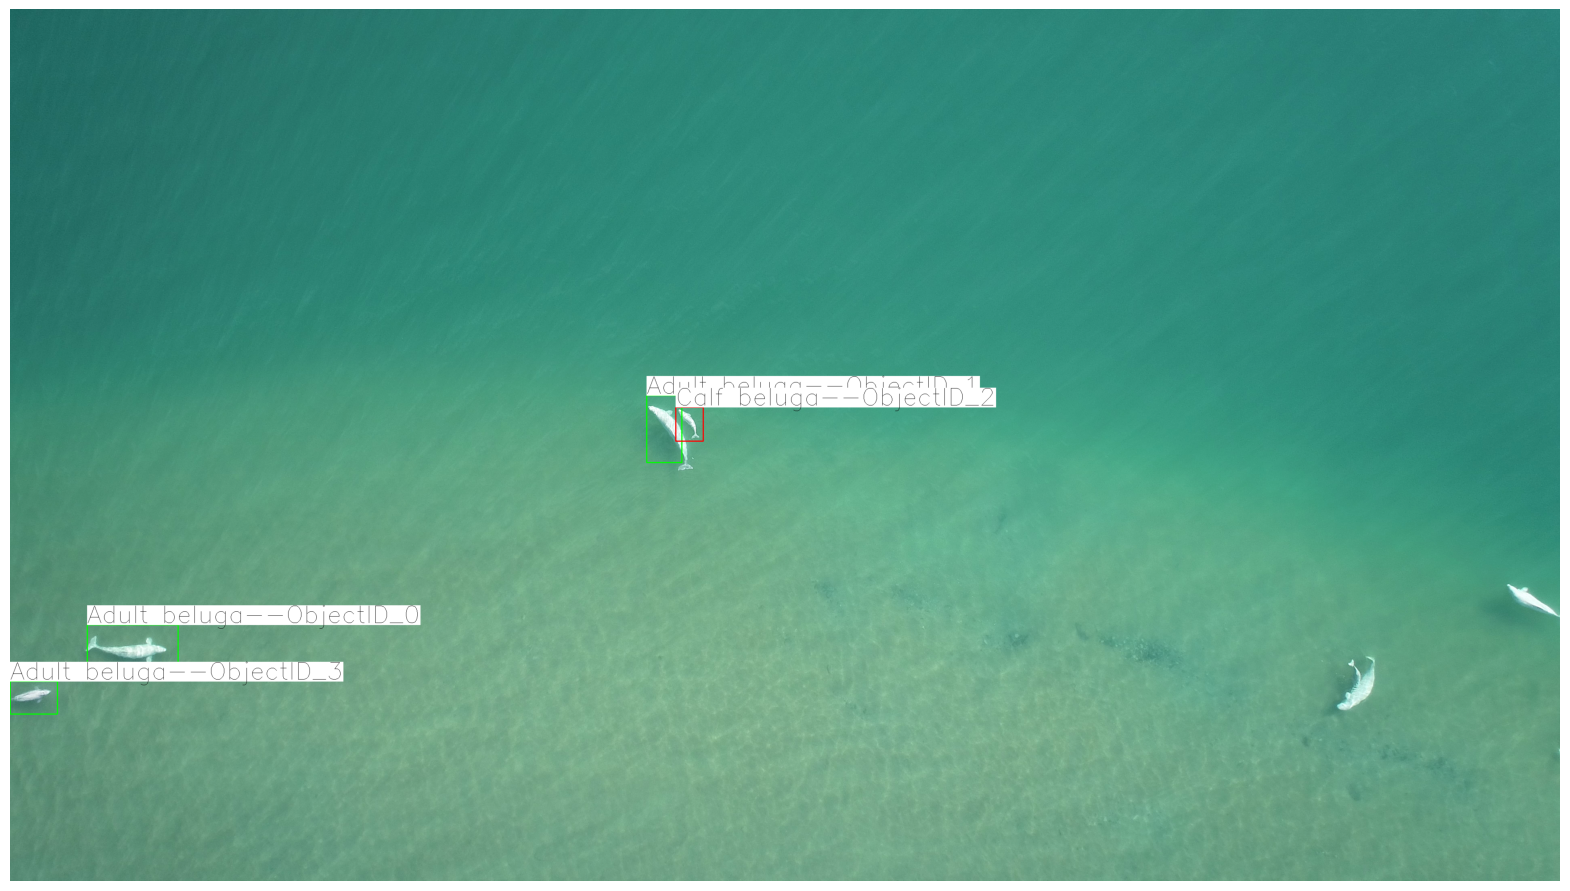

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def draw_bbox_on_image(img_path, bboxes):
    """
    Draw bounding boxes on an image with text annotations.
    
    Args:
    - img_path (str): Path to the input image file.
    - bboxes (list): List of bounding boxes and object information in the format (obj_id, obj_class, x1, y1, x2, y2).
    
    Returns:
    - None
    """
    # Read the image
    img = cv2.imread(img_path)
    
    # Check if the image was successfully loaded
    if img is None:
        print(f"Error: Unable to load image from {img_path}")
        return
    
    # Convert BGR to RGB (OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Define colors for different classes
    class_colors = {0: (0, 255, 0),  # Green for class 0
                    1: (255, 0, 0)}  # Red for class 1
    
    # Iterate over each bounding box
    for bbox in bboxes:
        obj_id, obj_class, x1, y1, x2, y2 = bbox
        
        obj_class_label = "Adult beluga" if obj_class == float(0.0) else "Calf beluga"
        
        # Draw rectangle on image
        color = class_colors.get(obj_class, (0, 0, 255))  # Blue for other classes
        cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        
        # Define text parameters
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 2
        font_thickness = 1
        text = f"{obj_class_label}--ObjectID_{obj_id}"
        
        # Get text size
        text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
        
        # Calculate text position
        text_x = int(x1)
        text_y = int(y1) - 5 if int(y1) - 5 > 0 else int(y1) + text_size[1] + 5
        
        # Draw text background
        cv2.rectangle(img_rgb, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y + 5), (255, 255, 255), -1)
        
        # Draw text
        cv2.putText(img_rgb, text, (text_x, text_y), font, font_scale, (0, 0, 0), font_thickness)
        
    
    # Set the figure size
    plt.figure(figsize=(20, 20))
    
    # Display the image using Matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axis
    plt.show()

# Test data with bounding boxes and object information
# bboxes = [
#     (35.0, 0.0, 1848.3435309717192, 670.6728277733679, 1944.85511459085, 794.2976919213098),
# (34.0, 0.0, 1659.5512782326248, 636.7826392923688, 1862.0265830797036, 802.9270801357746),
# (2.0, 0.0, 72.31844236845903, 1017.6844285774422, 326.27428827256404, 1216.7214076629957),
# (2.0, 1.0, 75.31844236845903, 1000.6844285774422, 315.27428827256404, 1216.7214076629957)
# ]

img_path = 'DJI_0004/yolo_dji_0004/frame_0031.png'

draw_bbox_on_image(img_path, test_gt_pixels)


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def draw_bbox_on_image(img_path, bboxes):
    """
    Draw bounding boxes on an image with text annotations.
    
    Args:
    - img_path (str): Path to the input image file.
    - bboxes (list): List of bounding boxes and object information in the format (obj_id, obj_class, x1, y1, x2, y2).
    
    Returns:
    - None
    """
    # Read the image
    img = cv2.imread(img_path)
    
    # Check if the image was successfully loaded
    if img is None:
        print(f"Error: Unable to load image from {img_path}")
        return
    
    # Convert BGR to RGB (OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Define colors for different classes
    class_colors = {0: (0, 255, 0),  # Green for class 0
                    1: (255, 0, 0)}  # Red for class 1
    
    # Iterate over each bounding box
    for bbox in bboxes:
        obj_id, obj_class, x1, y1, x2, y2 = bbox
        
        obj_class = "Adult beluga" if obj_class == 0 else "Calf beluga"
        
        # Draw rectangle on image
        color = class_colors.get(obj_class, (0, 0, 255))  # Blue for other classes
        cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        
        # Define text parameters
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_thickness = 1
        text = f"{obj_class}--ObjectID_{obj_id}"
        
        # Get text size
        text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
        
        # Calculate text position
        text_x = int(x1)
        text_y = int(y1) - 5 if int(y1) - 5 > 0 else int(y1) + text_size[1] + 5
        
        # Draw text background
        cv2.rectangle(img_rgb, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y + 5), (255, 255, 255), -1)
        
        # Draw text
        cv2.putText(img_rgb, text, (text_x, text_y), font, font_scale, (0, 0, 0), font_thickness)
        
    
    # Set the figure size
    plt.figure(figsize=(20, 20))
    
    # Display the image using Matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axis
    plt.show()

# Test data with bounding boxes and object information
bboxes = [
    (11.0, 1.0, 3315.3817497239324, 1606.4771773885989, 3355.041410013423, 1664.8970024512148),
    (7.0, 0.0, 3281.5098190867184, 1646.620967418295, 3396.2144484318424, 1751.2569153290342),
    (5.0, 0.0, 3712.179631954297, 1408.5980713461308, 3830.09338105932, 1540.2494542392897),
    (4.0, 0.0, 1572.923173340264, 972.2630958787979, 1687.292809208449, 1138.7484860089278),
    (2.0, 0.0, 193.20484008168324, 1521.961939104371, 394.2003571732768, 1649.0657252132066),
    (1.0, 1.0, 1658.8441828899445, 979.9313550282051, 1710.8115994569189, 1066.8487112715068)
]

bboxes_gt=[(0.0, 0.0, 65, 1015, 330, 1239),
 (1.0, 0.0, 1657, 641, 1851, 789),
 (2.0, 1.0, 1848, 668, 1954, 812)]

img_path = 'DJI_0004/yolo_dji_0004/frame_0301.png'

draw_bbox_on_image(img_path, bboxes_gt)


# Data Prep

In [14]:
def get_annot_dict(dir):
    
    object_ids=[]
    bboxes=[]
    object_classes=[]
    
    files = sorted(glob.glob(dir+'/*.txt'))
    
    for file in files:
        filename = file.split('/')[-1]
        
        
        with open(file, 'r') as f:
            # print(filename)
            annotations = [tuple(map(float, line.strip().split())) for line in f.readlines()]
            _ids = [annotation[0] for annotation in annotations]
            _classes = [annotation[1] for annotation in annotations]
            _bboxes = [annotation[2:] for annotation in annotations]
            
            
            # for i, annotation in enumerate(annotations):
                # print(annotation)
        object_ids.append(_ids)
        object_classes.append(_classes)
        bboxes.append(_bboxes)
                
                
    
    return object_ids, object_classes, bboxes

        

In [ ]:
files = sorted(glob.glob('DJI_0004/yolo_sort_tracking/*.txt'))
print(len(files))

In [126]:
sys_ids, sys_classes, sys_bboxes = get_annot_dict("DJI_0004/yolo_sort_tracking")
gt_ids, gt_classes, gt_bboxes = get_annot_dict("DJI_0004/DJI_0004_gt_tracking_labels")

In [131]:
sys_bboxes[0]

[(3315.3817497239324,
  1606.4771773885989,
  3355.041410013423,
  1664.8970024512148),
 (3281.5098190867184,
  1646.620967418295,
  3396.2144484318424,
  1751.2569153290342),
 (3712.179631954297, 1408.5980713461308, 3830.09338105932, 1540.2494542392897),
 (1572.923173340264, 972.2630958787979, 1687.292809208449, 1138.7484860089278),
 (193.20484008168324,
  1521.961939104371,
  394.2003571732768,
  1649.0657252132066),
 (1658.8441828899445,
  979.9313550282051,
  1710.8115994569189,
  1066.8487112715068)]

In [ ]:
# change gt values to pixel values

gt_bboxes_pixel = []

for bbox_frame in gt_bboxes:
    bboxes_inner = []
    for bbox_obj in bbox_frame:
        bx_pixel = yolo_to_pixels(3840,2160,bbox_obj)
        bboxes_inner.append(bx_pixel)
    gt_bboxes_pixel.append(bboxes_inner)

In [ ]:
def get_data(gt_dir, sys_dir):
    sys_ids, sys_classes, sys_bboxes = get_annot_dict(gt_dir)
    gt_ids, gt_classes, gt_bboxes = get_annot_dict(sys_dir)
    
    # change gt values to pixel values
    gt_bboxes_pixel = []

    for bbox_frame in gt_bboxes:
        bboxes_inner = []
        for bbox_obj in bbox_frame:
            bx_pixel = yolo_to_pixels(3840,2160,bbox_obj)
            bboxes_inner.append(bx_pixel)
        gt_bboxes_pixel.append(bboxes_inner)
        
    return sys_ids, sys_classes, sys_bboxes, gt_ids, gt_classes, gt_bboxes_pixel, gt_bboxes

In [ ]:
gt_bboxes_pixel

In [ ]:
sys_ids, sys_classes, sys_bboxes, gt_ids, gt_classes, gt_bboxes_pixel , gt_bboxes= get_data("DJI_0004/DJI_0004_gt_tracking_labels","DJI_0004/yolo_sort_tracking")

In [ ]:
gt_bboxes

In [ ]:
gt_bxpx = []
bbox_frame = gt_bboxes[0]
    # bboxes_inner = []
for bbox_obj in bbox_frame:
    print(bbox_obj)
    bx_pixel = yolo_to_pixels(3840,2160,bbox_obj)
    # bboxes_inner.append(bx_pixel)
    gt_bxpx.append(bx_pixel)

In [ ]:
bx_pixel

# Motmetrics

In [ ]:
# Motmetrics

import motmetrics as mm
import numpy as np

acc = mm.MOTAccumulator(auto_id=True)
dM=[]
metrics=['num_frames', 'num_objects','num_matches' ,
         'mota','motp', 'num_misses','num_false_positives','num_switches']
for i in range(len(gt_ids)):
    distance_matrix = mm.distances.iou_matrix(gt_bboxes_pixel[i], sys_bboxes[i], max_iou=0.7)
    
    dM.append(distance_matrix)
    acc.update(gt_ids[i],sys_ids[i],[dM[i]])
    mh = mm.metrics.create()
    summary = mh.compute(acc, metrics=metrics, name='acc')
print(summary)

In [75]:
new_gt

[(0, 0, 191, 1525, 416, 1642),
 (1, 0, 1577, 957, 1664, 1123),
 (2, 1, 1649, 986, 1717, 1070)]

In [79]:
# Motmetrics

import motmetrics as mm
import numpy as np

acc = mm.MOTAccumulator(auto_id=True)
dM=[]
metrics=['num_frames', 'num_objects','num_matches' ,
         'mota','motp', 'num_misses','num_false_positives','num_switches']


for i in range(len(new_gt)):
    distance_matrix = mm.distances.iou_matrix(new_gt[i][2:], new_sys[i][2:], max_iou=0.7)
        
    dM.append(distance_matrix)
    acc.update(new_gt[i],new_sys[i],[dM[i]])
    mh = mm.metrics.create()
    summary = mh.compute(acc, metrics=metrics, name='acc')
print(summary)

IndexError: tuple index out of range

In [ ]:
gt_bbx = [list(ele) for ele in gt_bboxes_pixel]



In [ ]:
gt_bboxes_pixel


In [ ]:
sys_ids, sys_classes, sys_bboxes, gt_ids, gt_classes, gt_bboxes_pixel = get_data("DJI_0004/DJI_0004_gt_tracking_labels","DJI_0004/yolo_sort_tracking")

In [ ]:
res = [list(ele) for ele in gt_bboxes_pixel[0]]

In [ ]:
res

# Post-Processing

In [ ]:
del sys_ids, sys_classes, sys_bboxes, gt_ids, gt_classes, gt_bboxes_pixel,gt_bboxes

In [ ]:
sys_ids, sys_classes, sys_bboxes, gt_ids, gt_classes, gt_bboxes_pixel,gt_bboxes = get_data("DJI_0004/DJI_0004_gt_tracking_labels","DJI_0004/yolo_sort_tracking")

In [128]:
sys_post = []

FP =0
FN =0

GT_PX ,mota=[],[]

FP_list, FN_list = [], []

for i in range(len(sys_ids)):
    # for j in range(len(gt_bboxes)):
        
    if len(sys_ids[i]) > len(gt_bboxes[i]):
        FN = len(sys_ids[i]) - len(gt_bboxes[i])
        FN_list.append(sys_ids[i])
    
    elif len(sys_ids[i]) < len(gt_bboxes[i]):
        FP = len(gt_bboxes[i]) - len(sys_ids[i])
        FP_list.append(FP)
    
    
    gt_px = []
    for bbox_obj in gt_bboxes[i]:
        bx_pixel = yolo_to_pixels(3840,2160,bbox_obj)
        gt_px.append(bx_pixel)
    GT_PX.append(gt_px)
    
    
    

In [129]:
GT_PX[0]

[(191, 1525, 416, 1642),
 (1577, 957, 1664, 1123),
 (1649, 986, 1717, 1070),
 (0, 1665, 117, 1746)]

In [130]:
sys_bboxes[0]

[(3315.3817497239324,
  1606.4771773885989,
  3355.041410013423,
  1664.8970024512148),
 (3281.5098190867184,
  1646.620967418295,
  3396.2144484318424,
  1751.2569153290342),
 (3712.179631954297, 1408.5980713461308, 3830.09338105932, 1540.2494542392897),
 (1572.923173340264, 972.2630958787979, 1687.292809208449, 1138.7484860089278),
 (193.20484008168324,
  1521.961939104371,
  394.2003571732768,
  1649.0657252132066),
 (1658.8441828899445,
  979.9313550282051,
  1710.8115994569189,
  1066.8487112715068)]

NameError: name 'y1' is not defined

In [171]:
def IOU(box1, box2):
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2
    x_inter1 = max(x1, x3)
    y_inter1 = max(y1, y3)
    x_inter2 = min(x2, x4)
    y_inter2 = min(y2, y4)
    
    width_inter = abs(x_inter2 - x_inter1)
    height_inter = abs(y_inter2 - y_inter1)
    
    area_inter = width_inter * height_inter
    width_box1 = abs(x2 - x1)
    height_box1 = abs(y2 - y1)
    width_box2 = abs(x4 - x3)
    height_box2 = abs(y4 - y3)
    area_box1 = width_box1 * height_box1
    area_box2 = width_box2 * height_box2
    area_union = area_box1 + area_box2 - area_inter
    iou = area_inter / area_union
    return round(abs(iou))

In [199]:
import torch
def box_iou(box1, box2):
    # https://github.com/pytorch/vision/blob/master/torchvision/ops/boxes.py
    """
    Return intersection-over-union (Jaccard index) of boxes.
    Both sets of boxes are expected to be in (x1, y1, x2, y2) format.
    Arguments:
        box1 (Tensor[N, 4])
        box2 (Tensor[M, 4])
    Returns:
        iou (Tensor[N, M]): the NxM matrix containing the pairwise
            IoU values for every element in boxes1 and boxes2
    """
    
    box1 = torch.tensor(box1)
    box2 = torch.tensor(box2)

    def box_area(box):
        # box = 4xn
        return (box[2] - box[0]) * (box[3] - box[1])

    area1 = box_area(box1.T)
    area2 = box_area(box2.T)

    # inter(N,M) = (rb(N,M,2) - lt(N,M,2)).clamp(0).prod(2)
    inter = (torch.min(box1[:, None, 2:], box2[:, 2:]) - torch.max(box1[:, None, :2], box2[:, :2])).clamp(0).prod(2)
    return inter / (area1[:, None] + area2 - inter)  # iou = inter / (area1 + area2 - inter)

In [244]:
for i in range(len(GT_PX)):

    iou = box_iou(GT_PX[i],sys_bboxes[i])
    x = torch.where(iou > 0.5)
    
    for k in range(x[0].shape[0]):
        print(f"Frame: {i}\nGT: {x[0][k]}\n")
    # print(f"Frame: {i}\tIOU: {x}\n")

Frame: 0
GT: 0

Frame: 0
GT: 1

Frame: 0
GT: 2

Frame: 1
GT: 0

Frame: 1
GT: 1

Frame: 1
GT: 2

Frame: 2
GT: 0

Frame: 2
GT: 1

Frame: 2
GT: 2

Frame: 3
GT: 0

Frame: 3
GT: 2

Frame: 4
GT: 0

Frame: 4
GT: 2

Frame: 5
GT: 0

Frame: 5
GT: 3

Frame: 6
GT: 0

Frame: 7
GT: 0

Frame: 7
GT: 1

Frame: 7
GT: 2

Frame: 7
GT: 3

Frame: 8
GT: 0

Frame: 8
GT: 1

Frame: 8
GT: 2

Frame: 9
GT: 0

Frame: 9
GT: 1

Frame: 9
GT: 2

Frame: 10
GT: 0

Frame: 10
GT: 1

Frame: 10
GT: 2

Frame: 11
GT: 1

Frame: 11
GT: 2

Frame: 12
GT: 0

Frame: 12
GT: 1

Frame: 12
GT: 2

Frame: 12
GT: 2

Frame: 13
GT: 0

Frame: 13
GT: 1

Frame: 13
GT: 2

Frame: 14
GT: 0

Frame: 14
GT: 1

Frame: 14
GT: 2

Frame: 15
GT: 0

Frame: 15
GT: 1

Frame: 15
GT: 2

Frame: 16
GT: 0

Frame: 16
GT: 1

Frame: 16
GT: 2

Frame: 17
GT: 0

Frame: 17
GT: 1

Frame: 17
GT: 3

Frame: 18
GT: 0

Frame: 18
GT: 1

Frame: 18
GT: 2

Frame: 18
GT: 3

Frame: 19
GT: 0

Frame: 19
GT: 1

Frame: 19
GT: 2

Frame: 19
GT: 3

Frame: 20
GT: 0

Frame: 20
GT: 1

Frame:

In [241]:
for i in range(x[0].shape[0]):
    print(i)

0
1
2


In [205]:
torch.tensor([(750, 1200, 1600, 1070)])

tensor([[ 750, 1200, 1600, 1070]])

In [230]:
sys_bboxes[0][3:6]

[(1572.923173340264, 972.2630958787979, 1687.292809208449, 1138.7484860089278),
 (193.20484008168324,
  1521.961939104371,
  394.2003571732768,
  1649.0657252132066),
 (1658.8441828899445,
  979.9313550282051,
  1710.8115994569189,
  1066.8487112715068)]

In [196]:
iou

1

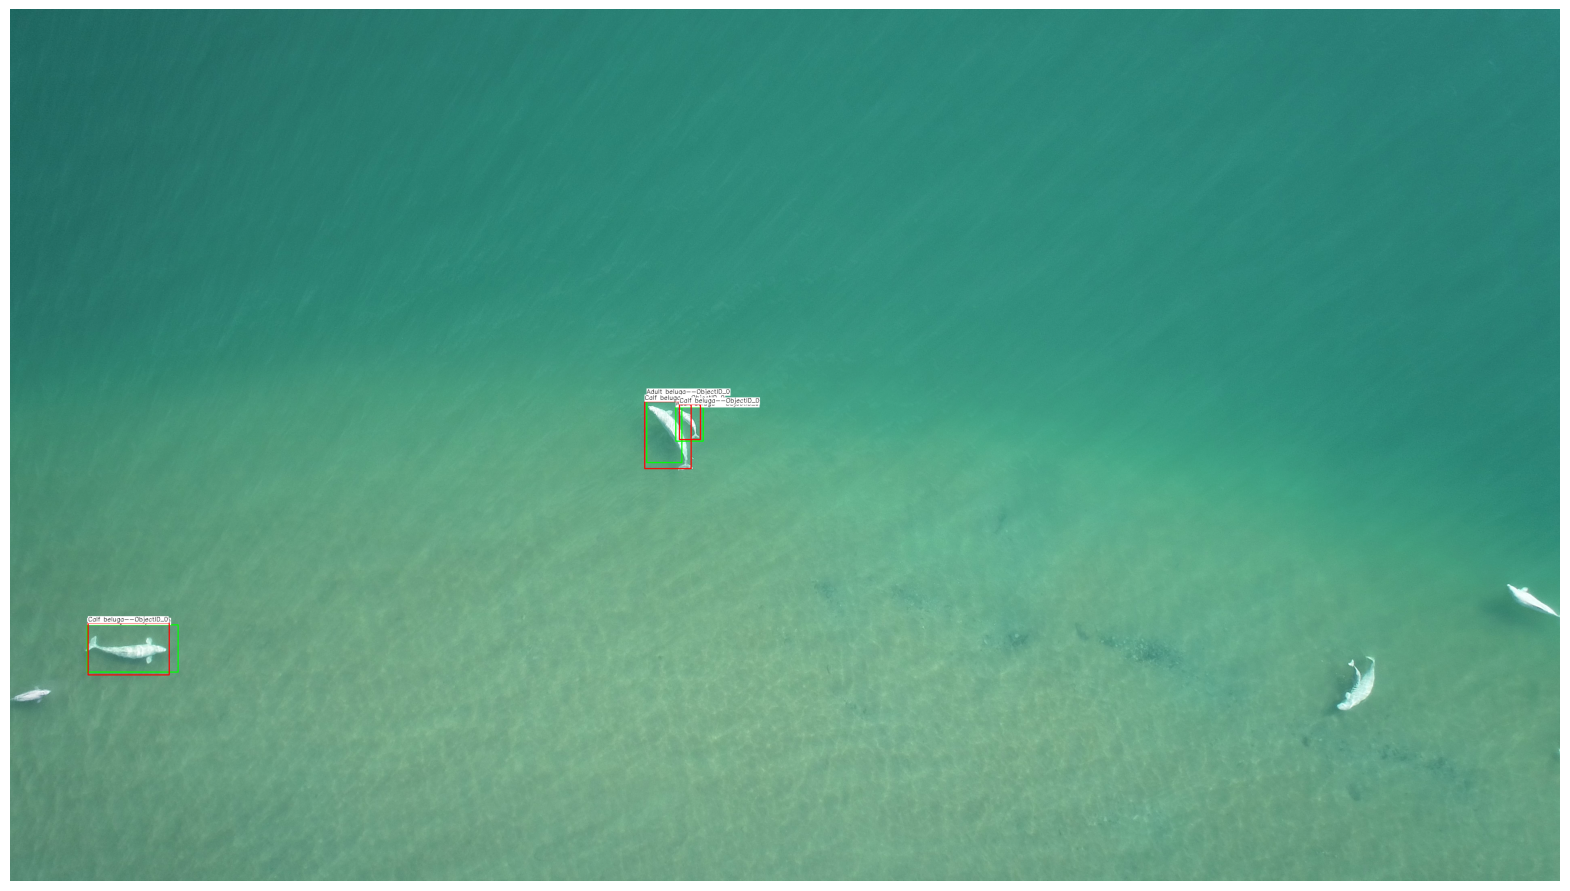

In [232]:
bboxes = [
(0, 0, 191, 1525, 416, 1642),
(0, 0,1577, 957, 1664, 1123),
(0, 0,1649, 986, 1717, 1070),
(0, 1,1572.923173340264, 972.2630958787979, 1687.292809208449, 1138.7484860089278),
(0, 1,193.20484008168324,1521.961939104371,394.2003571732768,1649.0657252132066),
(0, 1,1658.8441828899445,979.9313550282051,1710.8115994569189,1066.8487112715068),
]

img_path = 'DJI_0004/yolo_dji_0004/frame_0031.png'

draw_bbox_on_image(img_path, bboxes)